Data loaded successfully.

First few rows of the dataset:

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0 

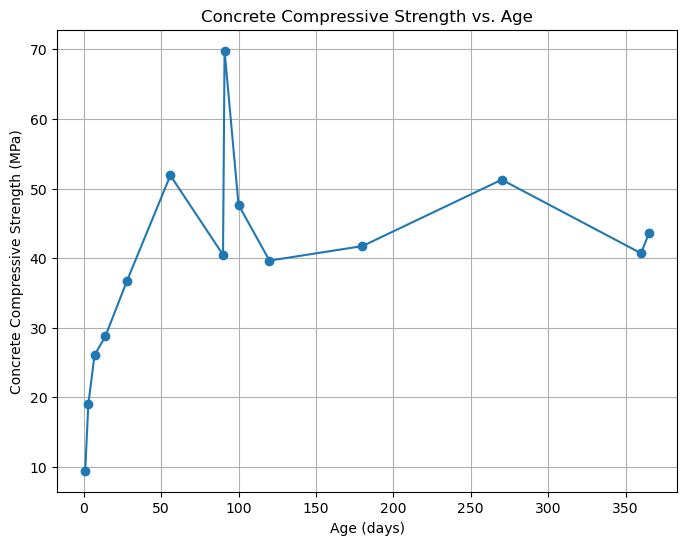

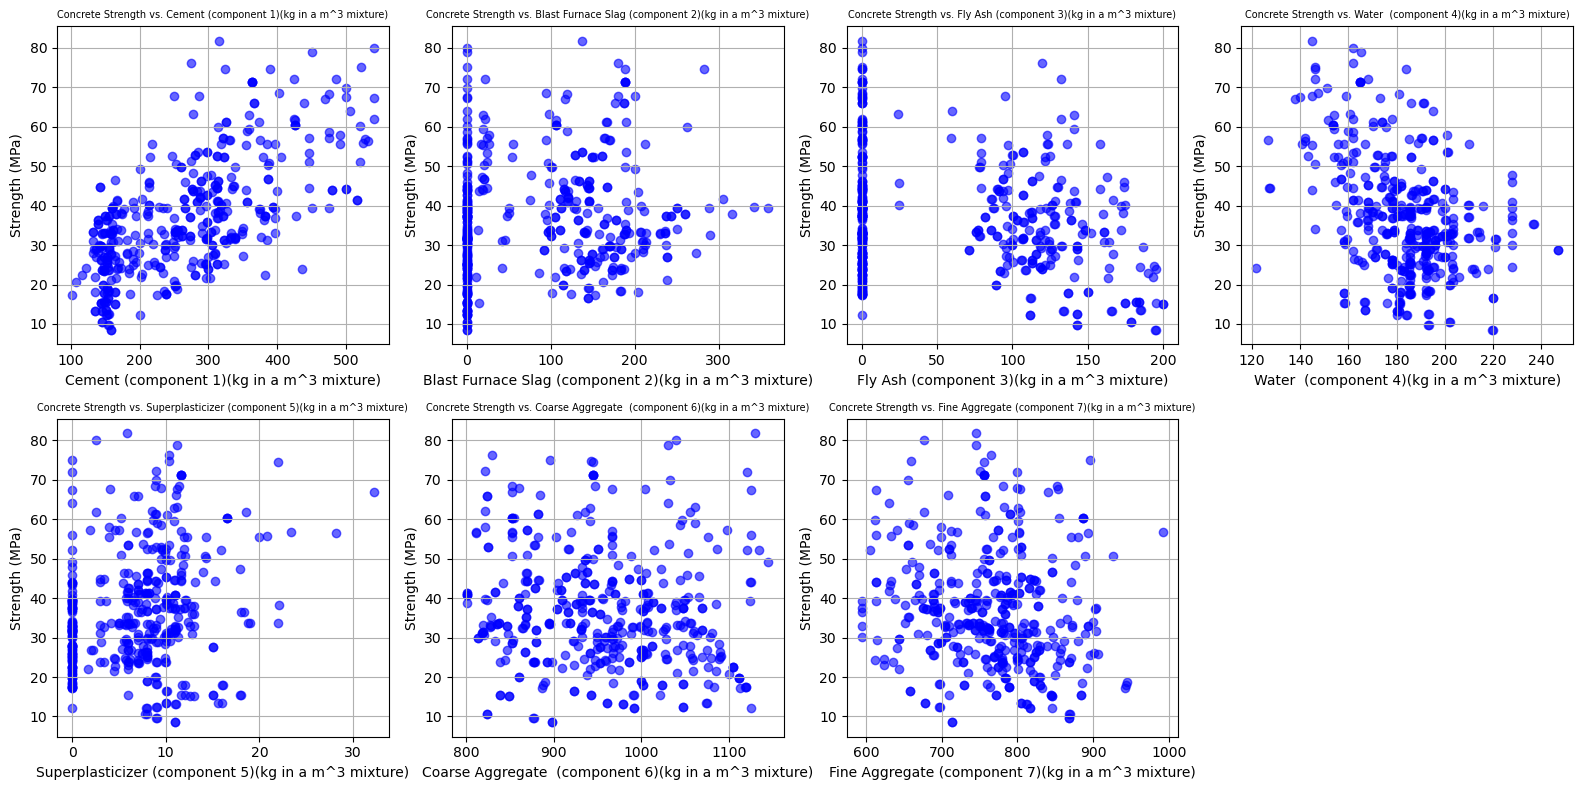

Mean Squared Error (MSE): 95.9755
R² Score: 0.6275


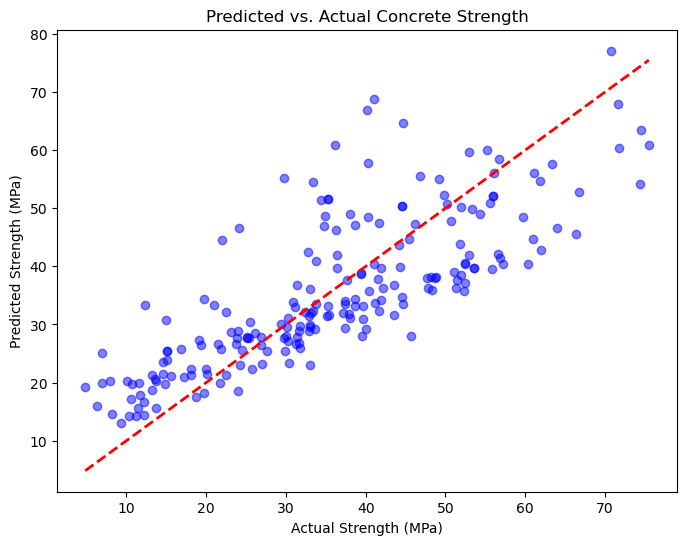

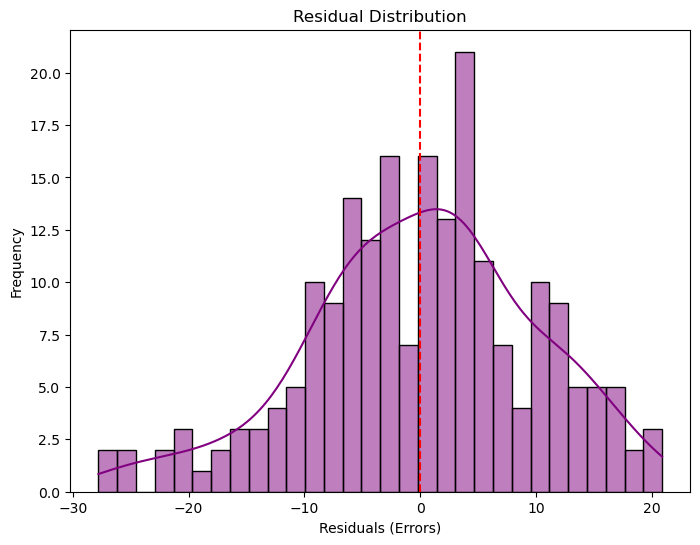

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path):
    """
    Load the dataset from a xls file.
    """
    try:
        df = pd.read_excel(file_path)
        print("Data loaded successfully.\n")
        print("First few rows of the dataset:\n")
        print(df.head())
        print("\nSummary statistics:")
        print(df.describe().drop(['25%', '50%', '75%']))
        print("\nMissing values in each column:")
        print(df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"Error: File not found. Ensure the file exists at the specified path: {file_path}")
        return None

def fill_missing_values(df):
    """
    Fills missing values in the dataset by replacing them with 
    the mean value of their respective age group for that feature.
    """
    df_filled = df.copy()
    
    # Get unique age groups
    unique_ages = df_filled.iloc[:, 7].unique()

    for age in unique_ages:
        # Select the subset of data for the current age group
        age_group = df_filled[df_filled.iloc[:, 7] == age]
        
        # Compute mean for each column in this age group
        age_means = age_group.mean()
        
        # Fill missing values in this age group with the computed means
        df_filled.loc[df_filled.iloc[:, 7] == age] = age_group.fillna(age_means)

    return df_filled


def visualize_data(df):

    age_column = df.columns[7]  # Age (8th column)
    strength_column = df.columns[8]  # Concrete Strength (9th column)
    feature_columns = df.columns[:7]  # First 7 columns (Concrete components)

    # Define selected Age groups
    df_28 = df[df[age_column] == 28]
    


    # Concrete Compressive Strength vs. Age
    grouped = df.groupby(age_column)[strength_column].mean()

    # Plotting the grouped data
    plt.figure(figsize=(8, 6))
    grouped.plot(kind='line', marker='o')
    plt.title('Concrete Compressive Strength vs. Age')
    plt.xlabel('Age (days)')
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.grid(True)
    plt.show()

    
    # Create subplots (2 rows, 4 columns)
    
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    axs = axs.flatten()  # Flatten for easy indexing

    # Plot each feature against Strength
    for i, feature in enumerate(feature_columns):
        ax = axs[i]
        ax.scatter(df_28[feature], df_28[strength_column], color='blue', alpha=0.6)
        ax.set_title(f'Concrete Strength vs. {feature}', fontsize=7)
        ax.set_xlabel(feature)
        ax.set_ylabel('Strength (MPa)')
        ax.grid(True)

    # Hide extra subplot if not needed
    fig.delaxes(axs[-1])  # Remove the last unused subplot
    plt.subplots_adjust()
    plt.tight_layout()
    plt.show()


def split_data(df):
    X = df.iloc[:, :-1]  # Features (all columns except the last one)
    y = df.iloc[:, -1]   # Target variable (last column)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


def train_evaluate_visualize(X_train, X_test, y_train, y_test):
    """
    Trains a Linear Regression model, evaluates its performance, and visualizes results.

    Parameters:
    - X_train, X_test: Feature matrices for training and testing.
    - y_train, y_test: Target values for training and testing.
    """

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot Predicted vs Actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Ideal line
    plt.xlabel("Actual Strength (MPa)")
    plt.ylabel("Predicted Strength (MPa)")
    plt.title("Predicted vs. Actual Concrete Strength")
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color="purple")
    plt.axvline(0, color='r', linestyle='dashed')
    plt.xlabel("Residuals (Errors)")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.show()

    return model  # Returning the trained model in case it's needed for further use

    
def main():
    file_path = '../../datasets/concrete_strength/Concrete_Data.xls'
    df = load_data(file_path)
    df = fill_missing_values(df)
    visualize_data(df)
    X_train, X_test, y_train, y_test = split_data(df)

    train_evaluate_visualize(X_train, X_test, y_train, y_test)


if __name__ == '__main__':
    main()



In [ ]:
ss

Data loaded successfully.

First few rows of the dataset:

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0 

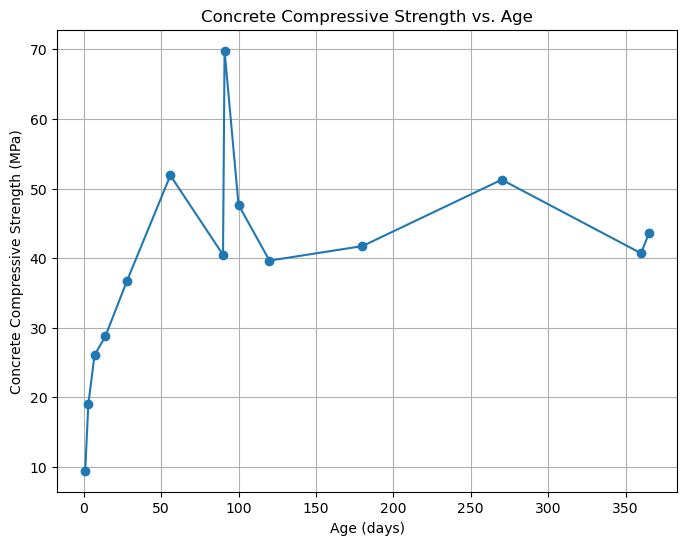

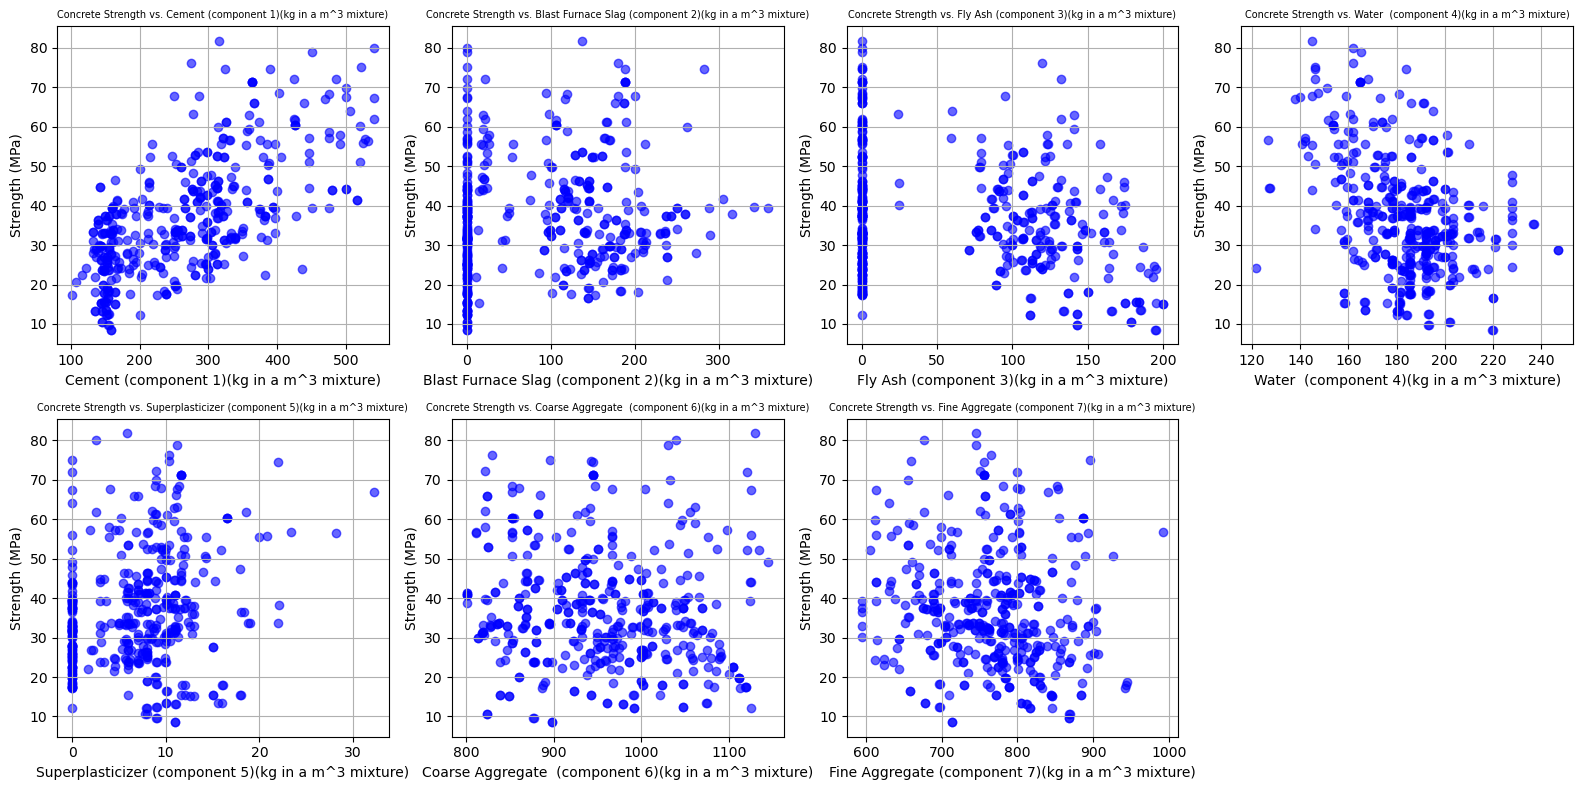

Mean Squared Error (MSE): 95.9755
R² Score: 0.6275


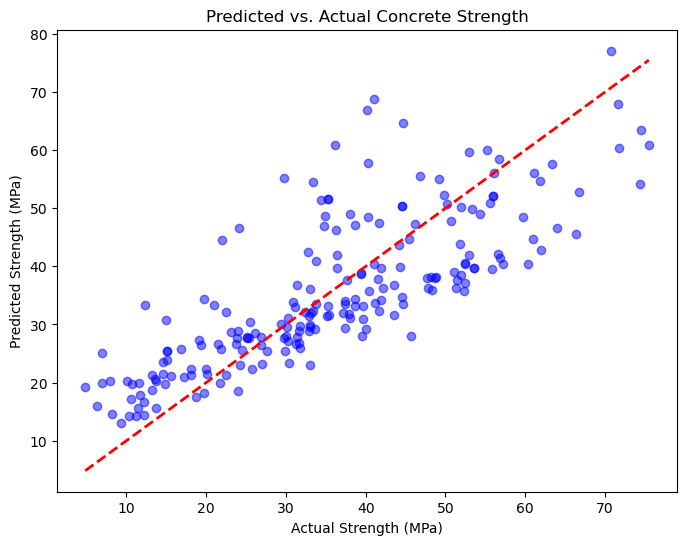

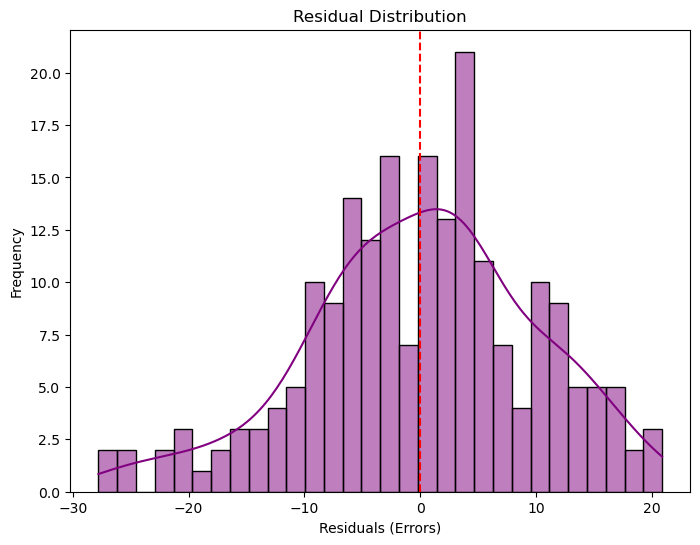

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path):
    """
    Load the dataset from a xls file.
    """
    try:
        df = pd.read_excel(file_path)
        print("Data loaded successfully.\n")
        print("First few rows of the dataset:\n")
        print(df.head())
        print("\nSummary statistics:")
        print(df.describe().drop(['25%', '50%', '75%']))
        print("\nMissing values in each column:")
        print(df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"Error: File not found. Ensure the file exists at the specified path: {file_path}")
        return None

def fill_missing_values(df):
    """
    Fills missing values in the dataset by replacing them with 
    the mean value of their respective age group for that feature.
    """
    df_filled = df.copy()
    
    # Get unique age groups
    unique_ages = df_filled.iloc[:, 7].unique()

    for age in unique_ages:
        # Select the subset of data for the current age group
        age_group = df_filled[df_filled.iloc[:, 7] == age]
        
        # Compute mean for each column in this age group
        age_means = age_group.mean()
        
        # Fill missing values in this age group with the computed means
        df_filled.loc[df_filled.iloc[:, 7] == age] = age_group.fillna(age_means)

    return df_filled


def visualize_data(df):

    age_column = df.columns[7]  # Age (8th column)
    strength_column = df.columns[8]  # Concrete Strength (9th column)
    feature_columns = df.columns[:7]  # First 7 columns (Concrete components)

    # Define selected Age groups
    df_28 = df[df[age_column] == 28]

    # Concrete Compressive Strength vs. Age
    grouped = df.groupby(age_column)[strength_column].mean()

    # Plotting the grouped data
    plt.figure(figsize=(8, 6))
    grouped.plot(kind='line', marker='o')
    plt.title('Concrete Compressive Strength vs. Age')
    plt.xlabel('Age (days)')
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.grid(True)
    plt.show()

    
    # Create subplots (2 rows, 4 columns)
    
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    axs = axs.flatten()  # Flatten for easy indexing

    # Plot each feature against Strength
    for i, feature in enumerate(feature_columns):
        ax = axs[i]
        ax.scatter(df_28[feature], df_28[strength_column], color='blue', alpha=0.6)
        ax.set_title(f'Concrete Strength vs. {feature}', fontsize=7)
        ax.set_xlabel(feature)
        ax.set_ylabel('Strength (MPa)')
        ax.grid(True)

    # Hide extra subplot if not needed
    fig.delaxes(axs[-1])  # Remove the last unused subplot
    plt.subplots_adjust()
    plt.tight_layout()
    plt.show()


def split_data(df):
    X = df.iloc[:, :-1]  # Features (all columns except the last one)
    y = df.iloc[:, -1]   # Target variable (last column)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


def train_evaluate_visualize(X_train, X_test, y_train, y_test):

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot Predicted vs Actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Ideal line
    plt.xlabel("Actual Strength (MPa)")
    plt.ylabel("Predicted Strength (MPa)")
    plt.title("Predicted vs. Actual Concrete Strength")
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color="purple")
    plt.axvline(0, color='r', linestyle='dashed')
    plt.xlabel("Residuals (Errors)")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.show()

    return model  # Returning the trained model in case it's needed for further use

    
def main():
    file_path = '../../datasets/concrete_strength/Concrete_Data.xls'
    df = load_data(file_path)
    df = fill_missing_values(df)
    visualize_data(df)
    X_train, X_test, y_train, y_test = split_data(df)

    train_evaluate_visualize(X_train, X_test, y_train, y_test)


if __name__ == '__main__':
    main()

